In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
px.histogram(df, x='age', y="charges", color='sex')

в целом, charges идут в возрастающем порядке по возрасту в обоих полах. За исключением огромных charges в 18-19 лет, особенно у male

In [4]:
# переводим значения в цифру
new_sex = {"male": 1, "female": 0}
new_smoker = {"yes": 1, "no": 0}
new_region = {'northeast': 1, 'northwest': 2, 'southwest': 3, 'southeast': 4}

df['sex'] = df['sex'].replace(new_sex)
df['smoker'] = df['smoker'].replace(new_smoker)
df['region'] = df['region'].replace(new_region)

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,4,1725.55230
2,28,1,33.000,3,0,4,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,1,2205.98080
1335,18,0,36.850,0,0,4,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [5]:
# делим на test и train
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values
y = df['charges'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
class LinearRegression:
    def __init__(self, learning_rate=0.4, epochs=50_000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    # функция нормализации
    def normalise(X, y):
        X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
        y_norm = (y - np.min(y)) / (np.max(y) - np.min(y)) 
        return X_norm, y_norm 

    # функция обучения
    def fit(self, X_train, y_train):

        samples, features = X_train.shape
        self.weights = np.zeros(features)
        self.bias = 0
        X_train, y_train = LinearRegression.normalise(X_train, y_train)

        for _ in range(self.epochs):
            y_pred = np.dot(X_train, self.weights) + self.bias
            
            # считаем градиент
            dw = (1/samples) * np.dot(X_train.T, (y_pred - y_train))
            db = (1/samples) * np.sum(y_pred - y_train)

            # обновление значений
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    # метод для предсказания
    def predict(self, X_test, y_test):
        X_test, y_test = LinearRegression.normalise(X_test, y_test)
        y_pred = np.dot(X_test, self.weights) + self.bias
        return y_pred

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test, y_test)
# обратная нормализация
predicted_charges = y_pred * (np.max(y) - np.min(y)) + np.min(y) 

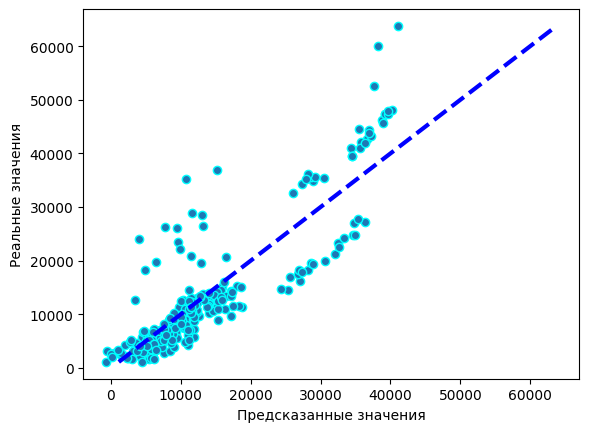

In [8]:
fig, ax = plt.subplots()
ax.scatter(predicted_charges, y_test, edgecolors=(0, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=3)
ax.set_xlabel('Предсказанные значения')
ax.set_ylabel('Реальные значения')
plt.show()